<a href="https://colab.research.google.com/github/fagonzalezo/sklearn-kdcrf/blob/master/examples/KDCRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup code

In [23]:
# Install kdrcf if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !git clone https://github.com/fagonzalezo/sklearn-kdcrf.git
    !mv sklearn-kdcrf/kdcrf .
    

Cloning into 'sklearn-kdcrf'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 83 (delta 20), reused 62 (delta 8), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [0]:
%matplotlib inline
import pylab as pl

# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    print(X.shape)
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

## Two moons classification

In [0]:
import warnings
import numpy as np
from kdcrf import KDClassifierRF


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)



(1000, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Score: 0.96


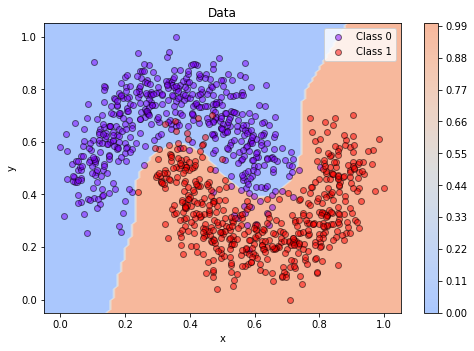

In [0]:
clf = KDClassifierRF(approx='exact', gamma=100)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X, y))

(1000, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Score: 0.957


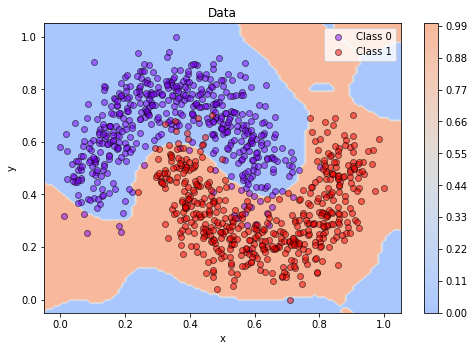

In [0]:
clf = KDClassifierRF(approx='rff', gamma=100, random_state=17, n_components=1000)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X, y))

In [0]:
import importlib
importlib.reload(kdcrf)

<module 'kdcrf' from '/content/kdcrf/__init__.py'>

(1000, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Score: 0.96


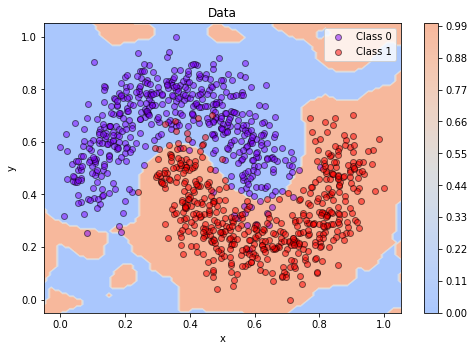

In [0]:
clf = KDClassifierRF(approx='rff+', gamma=100, random_state=17, n_components=1000)
clf.fit(X_train, y_train)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y)
print("Score:",clf.score(X, y))

## Digits classification

In [0]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)
from sklearn.decomposition import PCA

# The digits dataset
digits = datasets.load_digits(n_class=9)

n_samples = len(digits.data)
data = digits.data / 16.
data -= data.mean(axis=0)

# We learn the digits on the first half of the digits
data_train, targets_train = (data[:n_samples // 2],
                             digits.target[:n_samples // 2])


# Now predict the value of the digit on the second half:
data_test, targets_test = (data[n_samples // 2:],
                           digits.target[n_samples // 2:])

In [0]:
gammas = [2**i for i in range(-7,4)]

scores = {}
classifiers = {'svm':svm.SVC(), 'kdc exact':KDClassifierRF(approx='exact')}
for ncomp in [100, 500, 1000, 2000]:
    classifiers['kdc rff ' + str(ncomp)] = KDClassifierRF(approx='rff', 
                                                          n_components=ncomp,
                                                          random_state=1)
for clfn in classifiers.keys():
    scores[clfn] = []

for gamma in gammas:
    print(gamma,' ',end='')
    for clfn, clf in classifiers.items():
        clf.set_params(gamma=gamma)
        clf.fit(data_train, targets_train)
        scores[clfn].append(clf.score(data_test, targets_test))


0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 

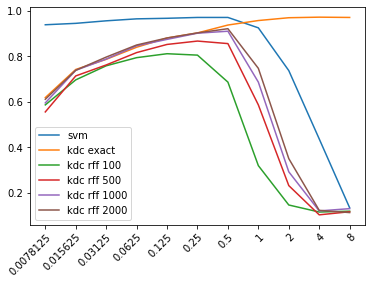

In [0]:
for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()

In [0]:
gammas = [2**i for i in range(-7,4)]

scores = {}
classifiers = {'svm':svm.SVC(), 'kdc exact':KDClassifierRF(approx='exact'),
               'rff 500':KDClassifierRF(approx='rff', n_components=500,
                                        random_state=1),
               'rff 2000':KDClassifierRF(approx='rff', n_components=2000,
                                        random_state=1),
               'rff+ 500':KDClassifierRF(approx='rff+', n_components=500,
                                        random_state=1),
               'rff+ 2000':KDClassifierRF(approx='rff+', n_components=2000,
                                        random_state=1)}

for clfn in classifiers.keys():
    scores[clfn] = []

for gamma in gammas:
    print(gamma,' ',end='')
    for clfn, clf in classifiers.items():
        clf.set_params(gamma=gamma)
        clf.fit(data_train, targets_train)
        scores[clfn].append(clf.score(data_test, targets_test))

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 

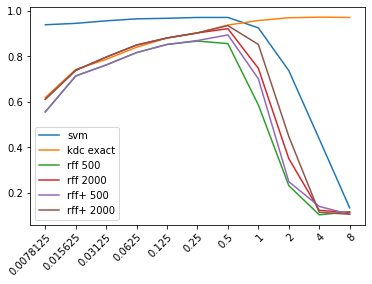

In [0]:
for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()

In [0]:
gammas = [2**i for i in range(-7,4)]

scores = {}
feature_map_fourier = RBFSampler(n_components=2000, random_state=1)
rff_svm = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                    ("svm", svm.LinearSVC())])

classifiers = {'svm':('gamma', svm.SVC()), 
               'kdc exact':('gamma', KDClassifierRF(approx='exact')),
               'rff+ 2000':('gamma', KDClassifierRF(approx='rff+', 
                                                    n_components=2000,
                                                    random_state=1)),
               'svm rff 2000':('feature_map__gamma',rff_svm)}

for clfn in classifiers.keys():
    scores[clfn] = []

for gamma in gammas:
    print(gamma,' ',end='')
    for clfn, (gname, clf) in classifiers.items():
        clf.set_params(**{gname:gamma})
        clf.fit(data_train, targets_train)
        scores[clfn].append(clf.score(data_test, targets_test))

0.0078125  0.015625  0.03125  0.0625  0.125  0.25  0.5  1  2  4  8  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 

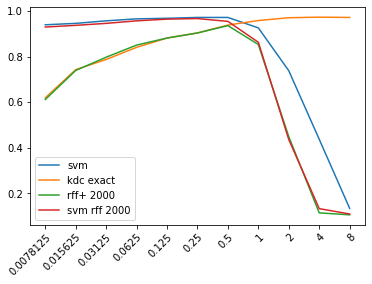

In [0]:
for clfn in classifiers.keys(): 
    pl.plot(np.arange(len(gammas)), scores[clfn], label=clfn)
pl.axes().set_xticks(np.arange(len(gammas)))
pl.axes().set_xticklabels(gammas)
pl.setp(pl.axes().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
pl.legend()